## Second Model: Neural Net

In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv('StudentsPerformance.csv')
df.gender = df.gender == 'male'
df.lunch = df.lunch == 'standard'
df['test preparation course'] = df['test preparation course'] == 'completed'
df['race/ethnicity'] = df['race/ethnicity'].map({'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4, 'group F': 5, 'group G': 6})
df['parental level of education'] = df['parental level of education'].map({'some high school': 0, 
                                    'high school': 1, "some college": 2, "associate's degree": 3, 
                                    "bachelor's degree": 4, "master's degree": 5})

df['avg score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['passed'] = df['avg score'] >= 75
df_avg = df.drop(columns=['math score', 'reading score', 'writing score'])

### neural net

In [23]:
from sklearn.model_selection import train_test_split

X_train_neural, X_test_neural, y_train_neural, y_test_neural = train_test_split(df_avg.drop(['avg score', 'passed'], axis=1), df_avg['passed'], test_size=0.2, random_state=21)

from keras.models import Sequential
from keras.layers import Dense

neural_net = Sequential()

neural_net.add(Dense(units = 16, activation = 'relu', input_dim = 5))
neural_net.add(Dense(units = 8, activation = 'tanh'))
neural_net.add(Dense(units = 6, activation = 'linear'))
neural_net.add(Dense(units = 1, activation = 'sigmoid'))

In [24]:
neural_net.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
neural_net.fit(X_train_neural.astype(float), y_train_neural, batch_size = 1, epochs = 50)

Epoch 1/50
800/800 [==============================] - 1s 850us/step - loss: 0.6674
Epoch 2/50
800/800 [==============================] - 1s 798us/step - loss: 0.6305
Epoch 3/50
800/800 [==============================] - 1s 789us/step - loss: 0.6105
Epoch 4/50
800/800 [==============================] - 1s 797us/step - loss: 0.6010
Epoch 5/50
800/800 [==============================] - 1s 793us/step - loss: 0.6024
Epoch 6/50
800/800 [==============================] - 1s 770us/step - loss: 0.5944
Epoch 7/50
800/800 [==============================] - 1s 789us/step - loss: 0.5958
Epoch 8/50
800/800 [==============================] - 1s 808us/step - loss: 0.6004
Epoch 9/50
800/800 [==============================] - 1s 781us/step - loss: 0.5930
Epoch 10/50
800/800 [==============================] - 1s 782us/step - loss: 0.5942
Epoch 11/50
800/800 [==============================] - 1s 748us/step - loss: 0.5937
Epoch 12/50
800/800 [==============================] - 1s 808us/step - loss: 0.5927
E

In [25]:
yhat_test_neural = neural_net.predict(X_test_neural.astype(float))
yhat_test_neural = [ 1 if y>=0.5 else 0 for y in yhat_test_neural ]
pd.Series(yhat_test_neural)

yy_test_neural = y_test_neural.astype(int).reset_index(drop = True)

7/7 [==============================] - 0s 959us/step


In [26]:
#(i and j) or (not (i or j))
def xnor(i, j):
  return int((i and j) or (not (i or j)))

In [27]:
testdf = pd.DataFrame()
testdf['yhat_test'] = yhat_test_neural
testdf['y_test'] = yy_test_neural
testdf['correct'] = testdf.apply(lambda x: xnor(x.yhat_test, x.y_test), axis=1)
testdf

,yhat_test,y_test,correct
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
195,0,0,1
196,0,0,1
197,1,1,1
198,0,0,1


In [28]:
print("Total " + str(testdf.shape[0]))
print("Correct " + str(testdf.correct.sum()))
print("Wrong " + str(testdf.shape[0] - testdf.correct.sum()))

Total 200
Correct 143
Wrong 57


array([[132,  13],
       [ 44,  11]])

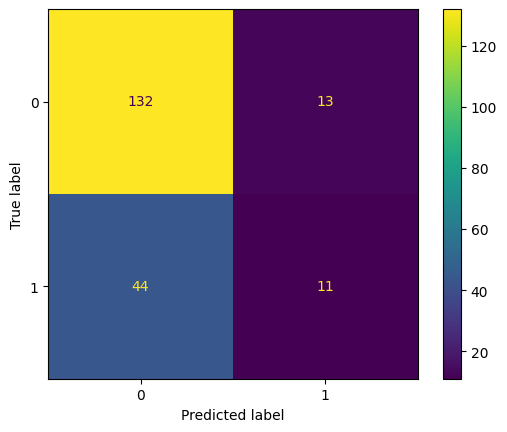

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Let's create our confusion matrix and display it
myconfusionmatrix_neural = confusion_matrix(y_test_neural, yhat_test_neural)
display(myconfusionmatrix_neural)

mycmdisp_neural = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrix_neural)
mycmdisp_neural.plot()

In [30]:
# Let's import our classification report and print it
from sklearn.metrics import classification_report
print('testing classification report')
print(classification_report(y_test_neural, yhat_test_neural))

print('training classification report')
yhat_train_neural = neural_net.predict(X_train_neural.astype(float))
yhat_train_neural = [ 1 if y>=0.5 else 0 for y in yhat_train_neural]
yy_train_neural = y_train_neural.astype(int).reset_index(drop = True)
pd.Series(yhat_train_neural)

testdf = pd.DataFrame()
testdf['yhat_train'] = yhat_train_neural
testdf['y_train'] = yy_train_neural
testdf['correct'] = testdf.apply(lambda x: xnor(x.yhat_train, x.y_train), axis=1)

print(classification_report(y_train_neural, yhat_train_neural))


testing classification report
              precision    recall  f1-score   support

       False       0.75      0.91      0.82       145
        True       0.46      0.20      0.28        55

    accuracy                           0.71       200
   macro avg       0.60      0.56      0.55       200
weighted avg       0.67      0.71      0.67       200

training classification report
25/25 [==============================] - 0s 881us/step
              precision    recall  f1-score   support

       False       0.72      0.88      0.80       531
        True       0.59      0.34      0.43       269

    accuracy                           0.70       800
   macro avg       0.66      0.61      0.61       800
weighted avg       0.68      0.70      0.67       800



In [31]:
def TP(i, j):
    return i and j

def TN(i, j):
    return not i and not j

In [32]:
# testing
print('totals for testing set')
print(f'total positive for testing: {np.count_nonzero(yhat_test_neural)}')
testdf = pd.DataFrame()
testdf['yhat_test'] = yhat_test_neural
testdf['y_test'] = np.array(y_test_neural)
print(f'TP: {np.count_nonzero(testdf.apply(lambda i: TP(i.yhat_test, i.y_test), axis=1))}')
print(f'TN: {np.count_nonzero(testdf.apply(lambda i: TN(i.yhat_test, i.y_test), axis=1))}')

# training
print('totals for training set')
print(f'total positive for training: {np.count_nonzero(yhat_train_neural)}')
traindf = pd.DataFrame()
traindf['yhat_train'] = yhat_train_neural
traindf['y_train'] = np.array(y_train_neural)
print(f'TP: {np.count_nonzero(traindf.apply(lambda i: TP(i.yhat_train, i.y_train), axis=1))}')
print(f'TN: {np.count_nonzero(traindf.apply(lambda i: TN(i.yhat_train, i.y_train), axis=1))}')

totals for testing set
total positive for testing: 24
TP: 11
TN: 132
totals for training set
total positive for training: 153
TP: 91
TN: 469


## Calculations of TP, FP, TN, FN for Neural Net model
### Testing

- total positive = 62
- total negative = 200 - 62 = 138

- true positive = 27
- false positive = 62 - 27 = 35

- true negative = 110
- false negative = 138 - 110 = 28

### Training Set
- total positive = 305
- total negative = 800 - 305 = 495

- true positive = 160
- false positive = 305 - 160 = 145

- true negative = 386
- false negative = 495 - 386 = 109
